# Agglomerative Clustering 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the datasets 
SC_df = pd.read_csv('./Datasets/Speherical_Clusters.csv') ## Sphereical Clusters
MC_df = pd.read_csv('./Datasets/moons_Clusters.csv') ## Moon Clusters
NC_df = pd.read_csv('./Datasets/Nested_Clusters.csv') ## Nested Clusters
HS_df = pd.read_csv('./Datasets/Mall_Customers.csv') ## Hierarchical Clustering -> Mall Customers 


### Functions 

In [3]:
## Standarising only the float columns in all the datasets and appending the categorical columns to the scaled data 
def scale_data(df):
    # Separating numeric columns (float64) from categorical (assuming label-encoded as int64 and object)
    numeric_columns = df.select_dtypes(include=['float64']).columns
    categorical_columns = df.select_dtypes(include=['object', 'int64']).columns

    # Scaling only the numeric columns
    scaler = StandardScaler()
    df_scaled_numeric = scaler.fit_transform(df[numeric_columns])

    # Converting scaled numeric data back to a DataFrame
    df_scaled_numeric = pd.DataFrame(df_scaled_numeric, columns=numeric_columns, index=df.index)

    # Combining scaled numeric data and original categorical data
    df_combined = pd.concat([df_scaled_numeric, df[categorical_columns]], axis=1)
    
    return df_combined

In [4]:
# Function to plot the dendogram
def print_dendogram(data, method):
    Z = linkage(data, method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.show()

In [5]:
# Function to get the clusters
def get_clusters(data, n_clusters, method):
    Z = linkage(data, method)
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    return clusters

In [6]:
# Function to perform agglomerative clustering
def run_hierarchical_clustering(data, n_clusters, method):
    # Perform agglomerative clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=method)
    labels = model.fit_predict(data)    
    return labels

In [7]:
# # Function to plot the clusters
# def plot_clusters(data, labels):
#     plt.figure(figsize=(10, 7))
#     plt.scatter(data[:, 0], data[:, 1], c=labels, s=100, cmap='viridis')
#     plt.title('Agglomerative Clustering Results')
#     plt.colorbar(label='Cluster Label')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.show()

In [8]:
# Function to plot the clusters in 3D
def plot_3d_clusters(data, labels, title):
    fig = px.scatter_3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], title= title, color=labels)
    fig.show()

In [9]:
# Function to compute the silhouette score and plot the graphs for different number of clusters
def compute_silhouette_scores(data, max_clusters=10, method='ward'):
    # List to store the silhouette scores for different cluster numbers
    silhouette_scores = []
    
    # Iterate over a range of number of clusters
    for n_clusters in range(2, max_clusters + 1):
        # Perform agglomerative clustering with the given number of clusters
        labels = run_hierarchical_clustering(data, n_clusters, method)
        
        # Calculate silhouette score and append it to the list
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    # Plot the silhouette scores for each number of clusters
    plt.figure(figsize=(10, 7))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
    
    # Return the optimal number of clusters (the one with the highest silhouette score)
    optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 to match the range
    highest_score = max(silhouette_scores)
    
    print(f'Silhouette score: {highest_score:.4f}')
    print(f'Optimal number of clusters based on silhouette score: {optimal_clusters}')
    
    return optimal_clusters

In [10]:
# Plot the clusters and the ground truth labels
def plot_clustering_and_truth(X, Y, cluster_labels, ground_truth_labels):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot clustering results from Agglomerative Clustering
    axes[0].scatter(X[:, 0], X[:, 1], c=cluster_labels, s=30, cmap='viridis', alpha=0.6)
    axes[0].set_title('Agglomerative Clustering Results')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')

    # Plot ground truth labels
    axes[1].scatter(Y[:, 0], Y[:, 1], c=ground_truth_labels, s=30, cmap='jet', alpha=0.6)
    axes[1].set_title('Ground Truth Labels')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

### Hierarchical Clustering 

In [11]:
HS_df.head()
## Considering Gender column as categorical variable and dropping CustomerID column

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
## converting int to float to scale the data for easier computation
HS_df['Age'] = HS_df['Age'].astype(float) 
HS_df['Annual Income (k$)'] = HS_df['Annual Income (k$)'].astype(float)
HS_df['Spending Score (1-100)'] = HS_df['Spending Score (1-100)'].astype(float)
HS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


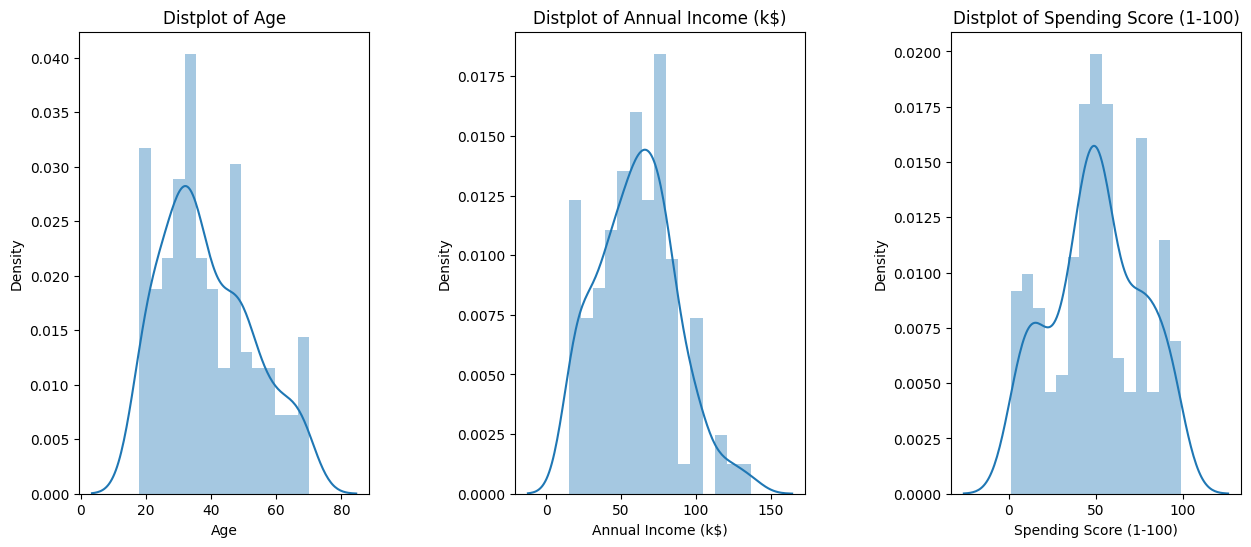

In [13]:
# Plotting the distribution of features
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(HS_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()
## Gender is a categorical variable and will convert it as such 

In [14]:
# Scaling the data
HS_df_modified = scale_data(HS_df)
HS_df_modified.head()

,Age,Annual Income (k$),Spending Score (1-100),CustomerID,Gender
0,-1.424569,-1.738999,-0.434801,1,Male
1,-1.281035,-1.738999,1.195704,2,Male
2,-1.352802,-1.700830,-1.715913,3,Female
3,-1.137502,-1.700830,1.040418,4,Female
4,-0.563369,-1.662660,-0.395980,5,Female


In [15]:
## label encoding for 'Gender' column in HS_df
label_encoder = preprocessing.LabelEncoder() 
# Encoding Gender column
HS_df_modified['Gender'] = label_encoder.fit_transform(HS_df_modified['Gender'])
# Dropping CustomerID column
HS_df_modified.drop(columns=['CustomerID'], inplace=True) 
HS_df_modified.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


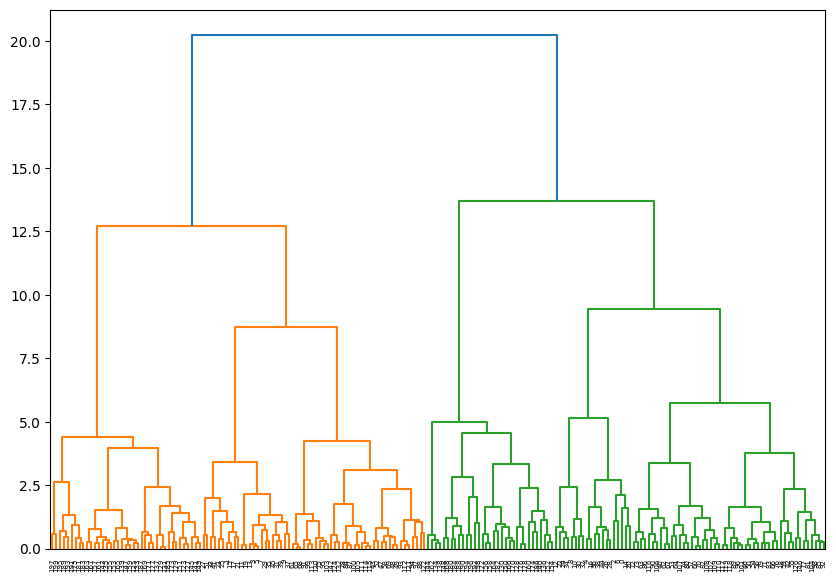

In [16]:
# Plotting the dendogram
print_dendogram(HS_df_modified, 'ward')

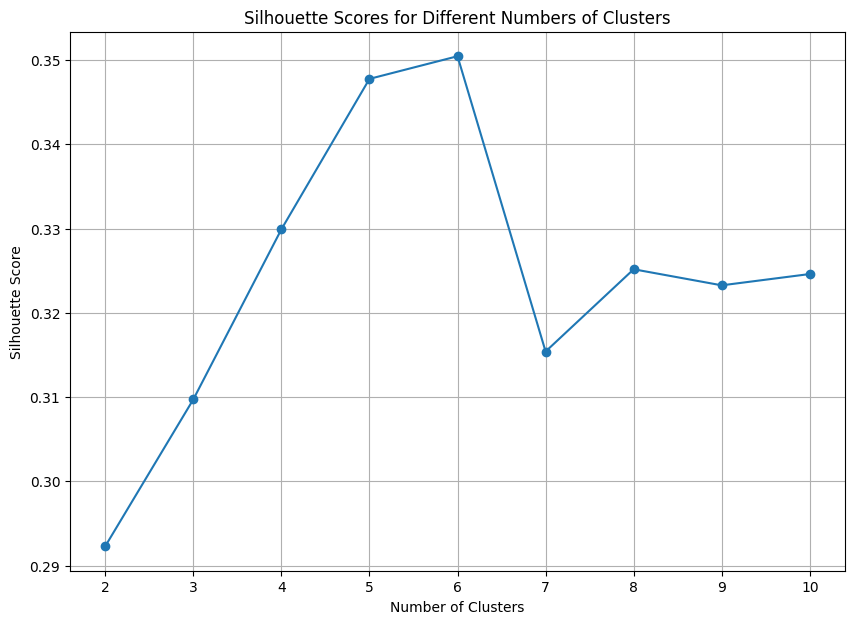

Silhouette score: 0.3504
Optimal number of clusters based on silhouette score: 6


In [17]:
# Finding the optimal clusters using silhouette score
x = compute_silhouette_scores(HS_df_modified, max_clusters=10, method='ward')

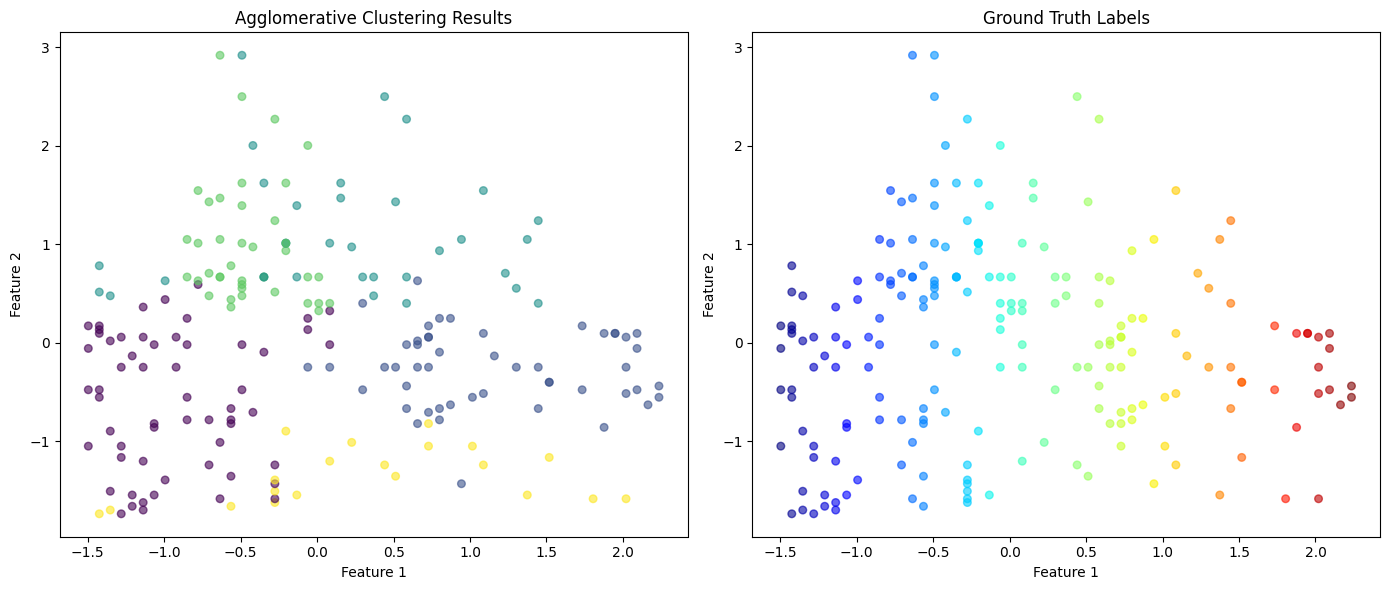

In [18]:
# Running hierarchical clustering with the optimal number of clusters and plotting the results
hs = run_hierarchical_clustering(HS_df_modified, 5, 'ward')
plot_clustering_and_truth(HS_df_modified.values, HS_df_modified.values, hs, HS_df['Age'])

In [19]:
# Plotting the clusters in 3D for better visualization
plot_3d_clusters(HS_df_modified.values, run_hierarchical_clustering(HS_df_modified, 5, 'ward'), '3D Agglomerative Clustering on Mall Customers Dataset')

In [20]:
plot_3d_clusters(HS_df_modified.values, HS_df_modified['Spending Score (1-100)'], '3D Ground Truth of Mall Customers Dataset')

### Spherical Clusters

In [21]:
SC_df.head()
## Considering cluster column as categorical variable 

,Feature1,Feature2,Cluster
0,-2.004128,7.852632,3
1,0.670479,4.040943,0
2,-2.263678,8.273068,3
3,-2.350730,2.277237,2
4,2.228740,1.145386,1


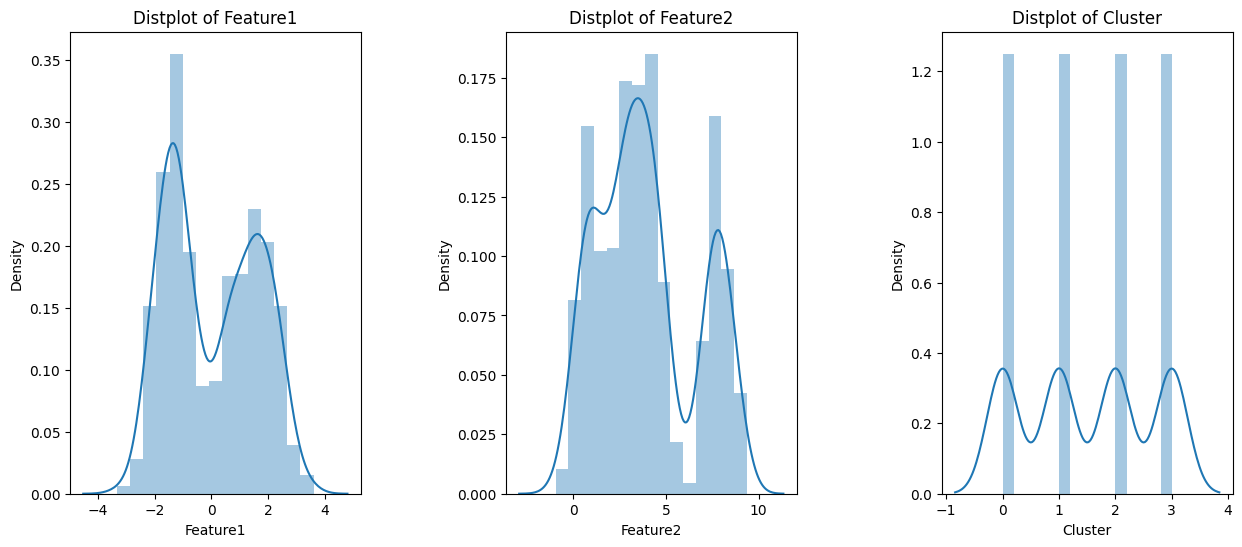

In [22]:
# plot the distribution of features
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Feature1' , 'Feature2' , 'Cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(SC_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [23]:
print("Unique values in Cluster column: ", len(SC_df['Cluster'].unique()), SC_df['Cluster'].unique())
## Considering cluster column as categorical variable

Unique values in Cluster column:  4 [3 0 2 1]


In [24]:
# Scaling the data
SC_df_modified = scale_data(SC_df)
print(SC_df_modified.head())

   Feature1  Feature2  Cluster
0 -1.291821  1.483035        3
1  0.393237  0.023513        0
2 -1.455343  1.644022        3
3 -1.510187 -0.651822        2
4  1.374974 -1.085215        1


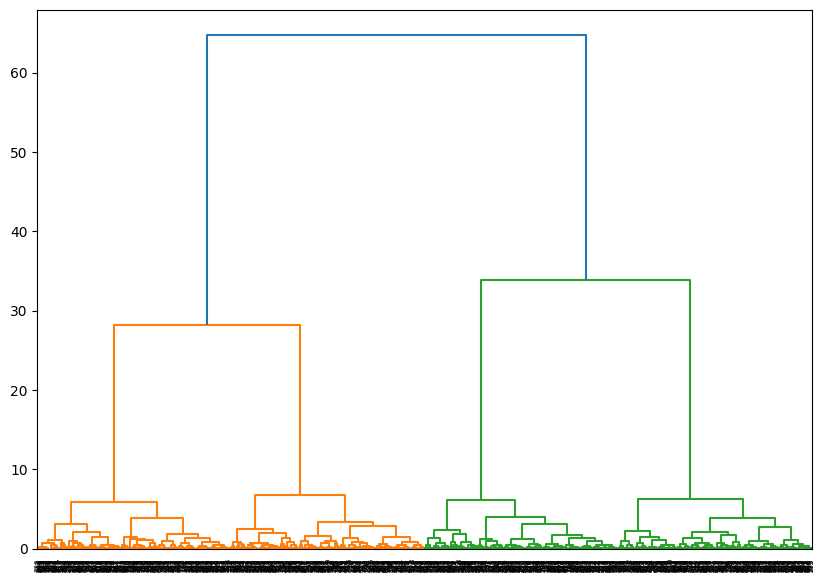

In [25]:
# Plotting the dendogram
print_dendogram(SC_df_modified, 'ward')

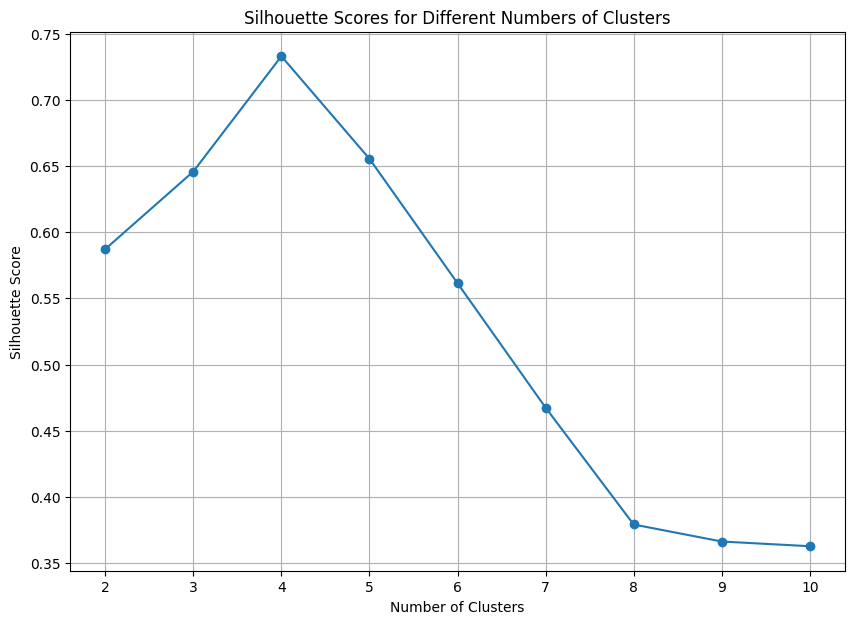

Silhouette score: 0.7329
Optimal number of clusters based on silhouette score: 4


In [26]:
# Finding the optimal clusters using silhouette score
y = compute_silhouette_scores(SC_df_modified, max_clusters=10, method='ward')

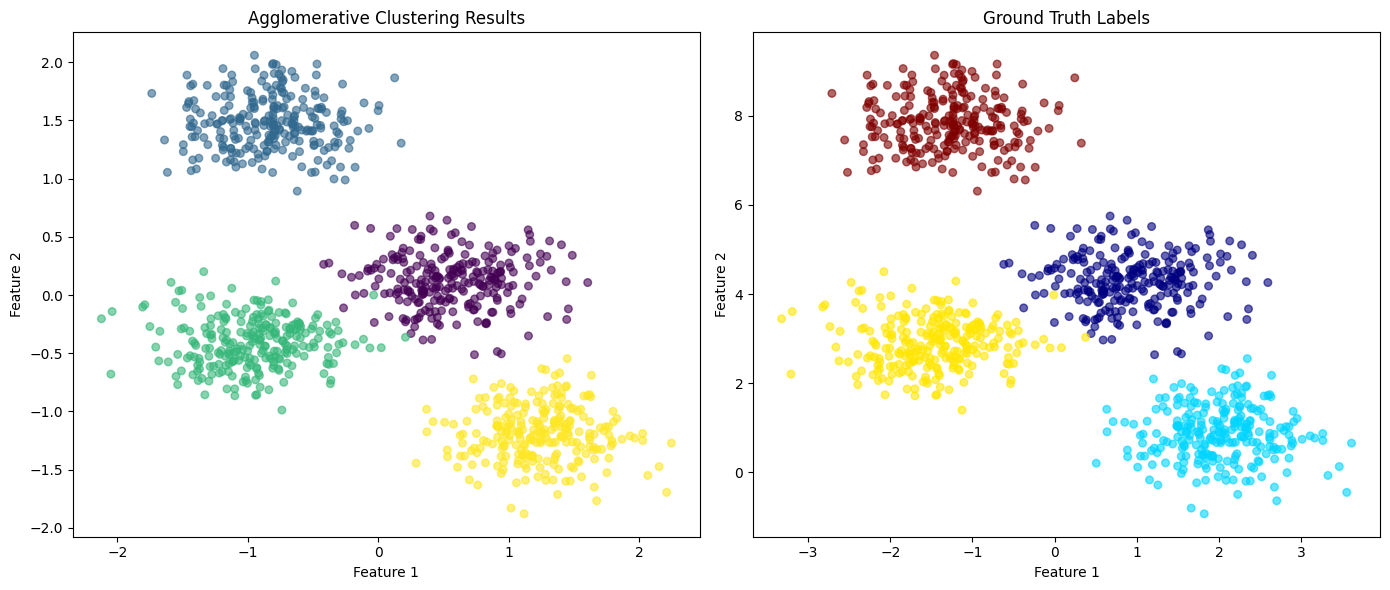

In [27]:
# Running hierarchical clustering with the optimal number of clusters and plotting the results
sc = run_hierarchical_clustering(SC_df_modified, 4, 'ward')
plot_clustering_and_truth(SC_df_modified.values, SC_df.values, sc, SC_df['Cluster'])

### Moon Clusters 

In [28]:
MC_df.head()

,Feature1,Feature2,Cluster
0,2.064430,0.546069,1
1,1.762473,-0.062689,1
2,-0.245490,0.668868,0
3,-0.174630,0.183882,1
4,0.452110,-0.406512,1


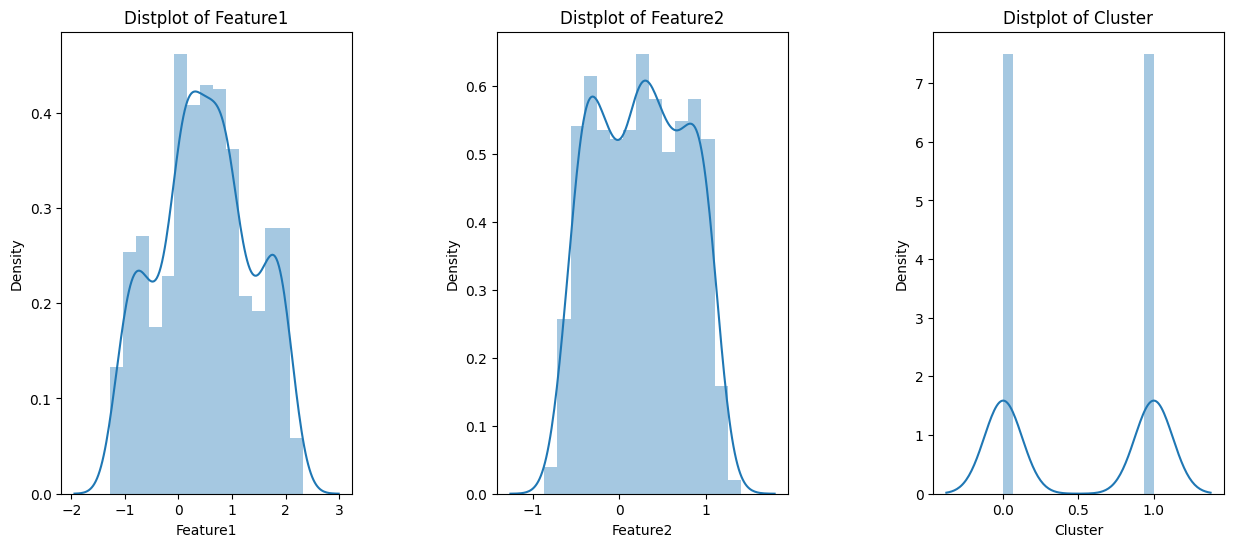

In [29]:
# Plotting the distribution of features
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Feature1' , 'Feature2' , 'Cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(MC_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [30]:
print("Unique values in Cluster column: ", len(MC_df['Cluster'].unique()), MC_df['Cluster'].unique())
## Considering cluster column as categorical variable 

Unique values in Cluster column:  2 [1 0]


In [31]:
# Scaling the data
MC_df_modified = scale_data(MC_df)
MC_df_modified.head()

,Feature1,Feature2,Cluster
0,1.774561,0.573310,1
1,1.431645,-0.598025,1
2,-0.848695,0.809592,0
3,-0.768224,-0.123589,1
4,-0.056467,-1.259588,1


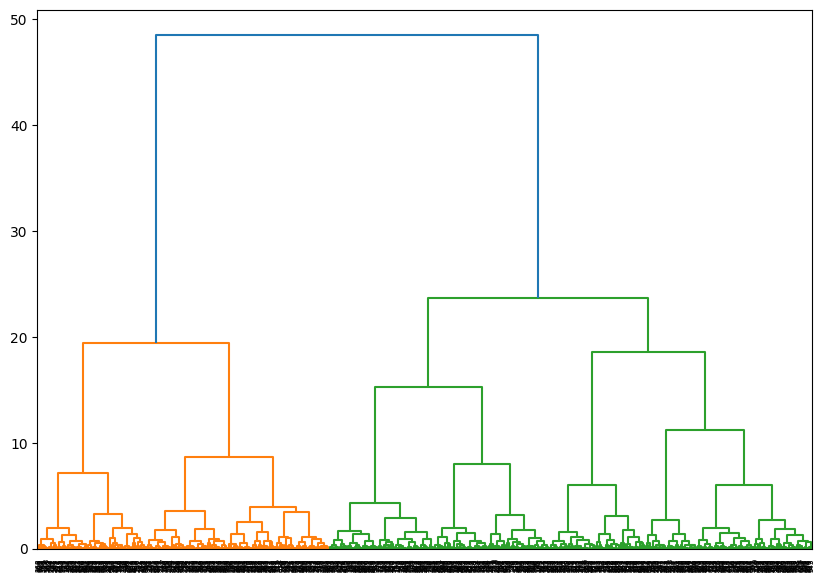

In [32]:
# Plotting the dendogram
print_dendogram(MC_df_modified, 'ward')

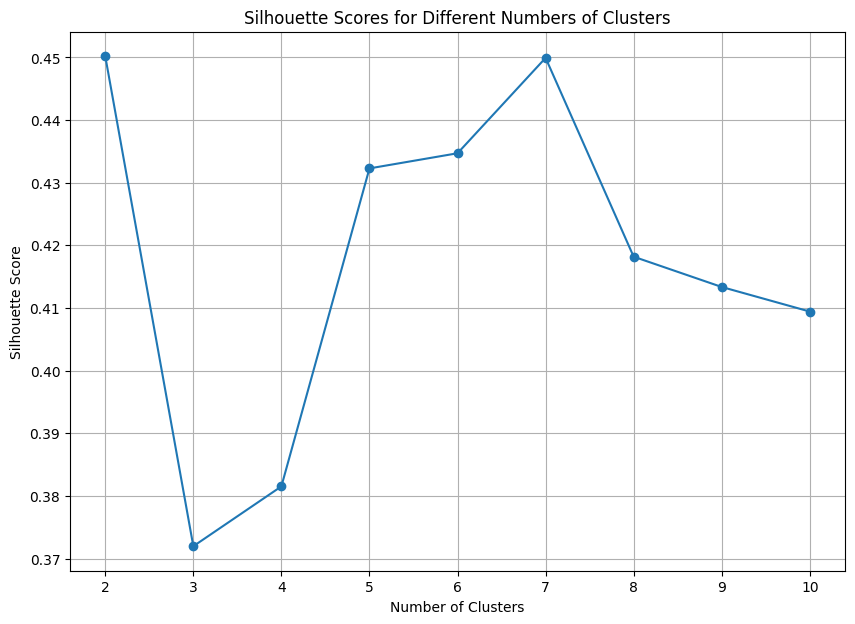

Silhouette score: 0.4502
Optimal number of clusters based on silhouette score: 2


In [33]:
# Finding the optimal clusters using silhouette score
z = compute_silhouette_scores(MC_df_modified, max_clusters=10, method='ward')

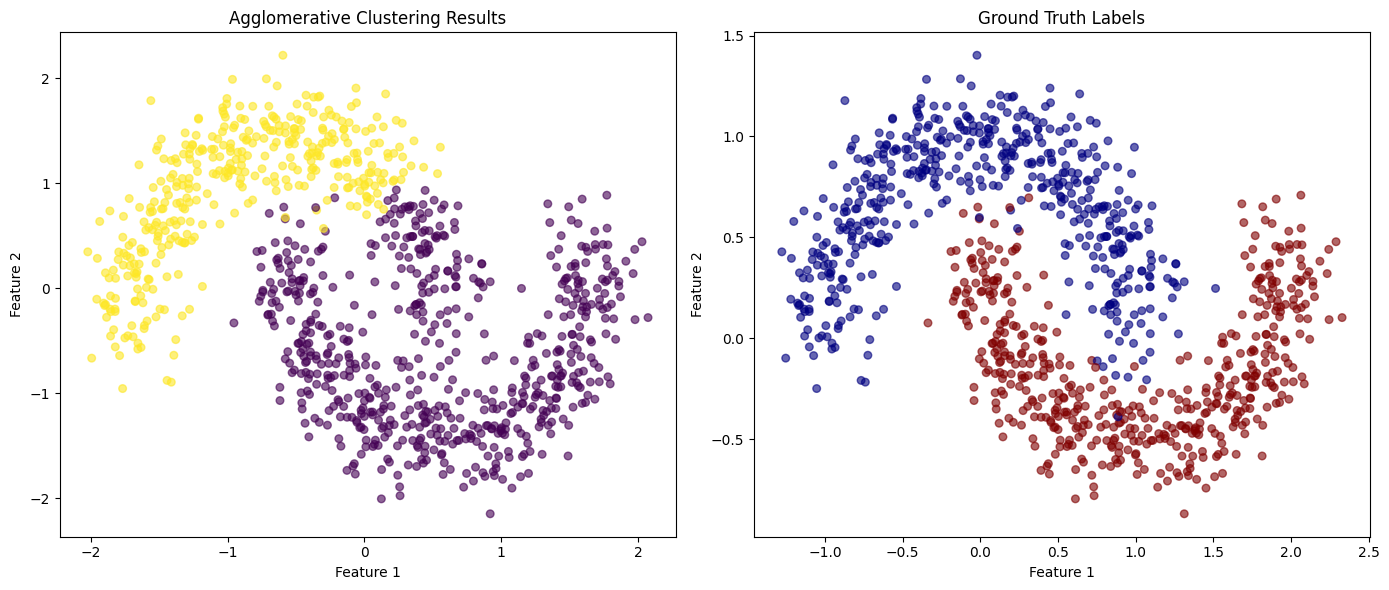

In [34]:
# Running hierarchical clustering with the optimal number of clusters and plotting the results
mc = run_hierarchical_clustering(MC_df_modified, 2, 'ward')
plot_clustering_and_truth(MC_df_modified.values, MC_df.values, mc, MC_df['Cluster'])

### Nested Clusters 

In [35]:
NC_df.head()

,Feature1,Feature2,Cluster
0,-0.163255,-0.086455,0
1,-0.011146,0.011499,0
2,-2.115056,1.405365,2
3,0.542611,0.715939,1
4,2.320800,0.117091,2


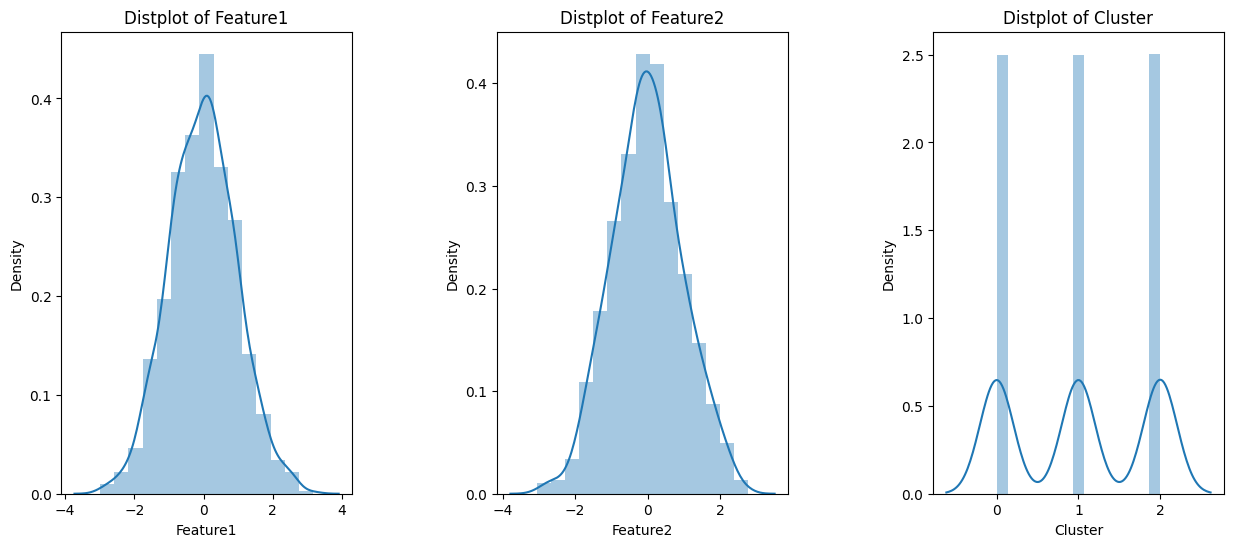

In [36]:
# Plotting the distribution of features
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Feature1' , 'Feature2' , 'Cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(NC_df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [37]:
print("Unique values in Cluster column: ", len(NC_df['Cluster'].unique()), NC_df['Cluster'].unique())
## Considering cluster column as categorical variable 

Unique values in Cluster column:  3 [0 2 1]


In [38]:
# Scaling the data
NC_df_modified = scale_data(NC_df)
NC_df_modified.head()

,Feature1,Feature2,Cluster
0,-0.145239,-0.077976,0
1,0.010869,0.021800,0
2,-2.148349,1.441599,2
3,0.579183,0.739346,1
4,2.404117,0.129357,2


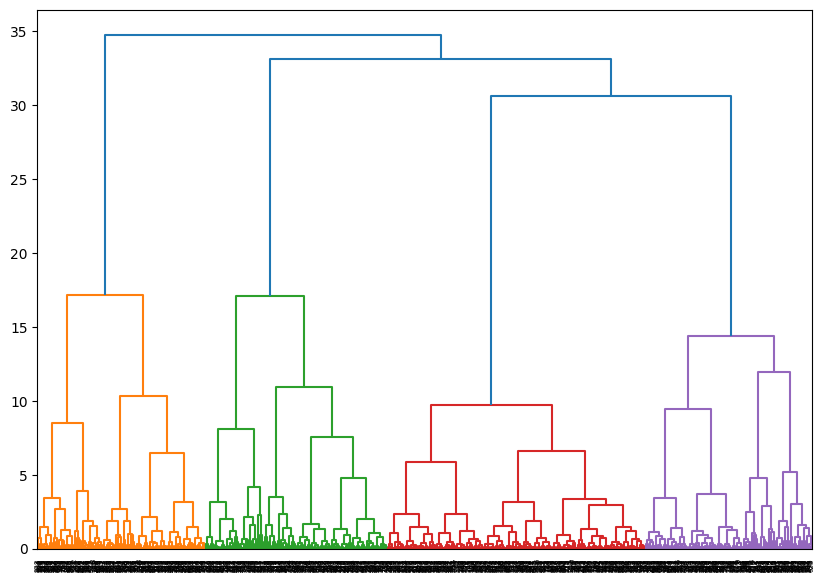

In [39]:
# Plotting the dendogram
print_dendogram(NC_df_modified, 'ward')

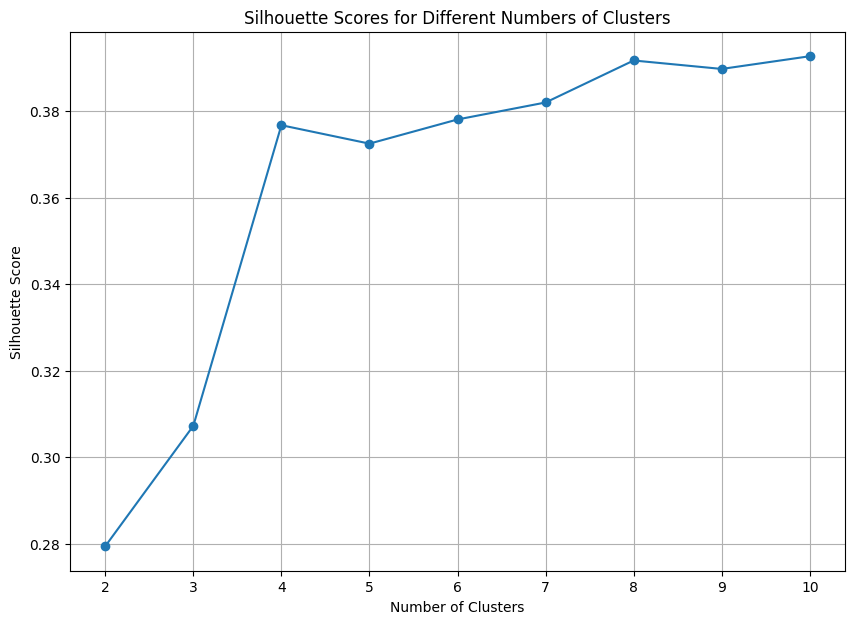

Silhouette score: 0.3927
Optimal number of clusters based on silhouette score: 10


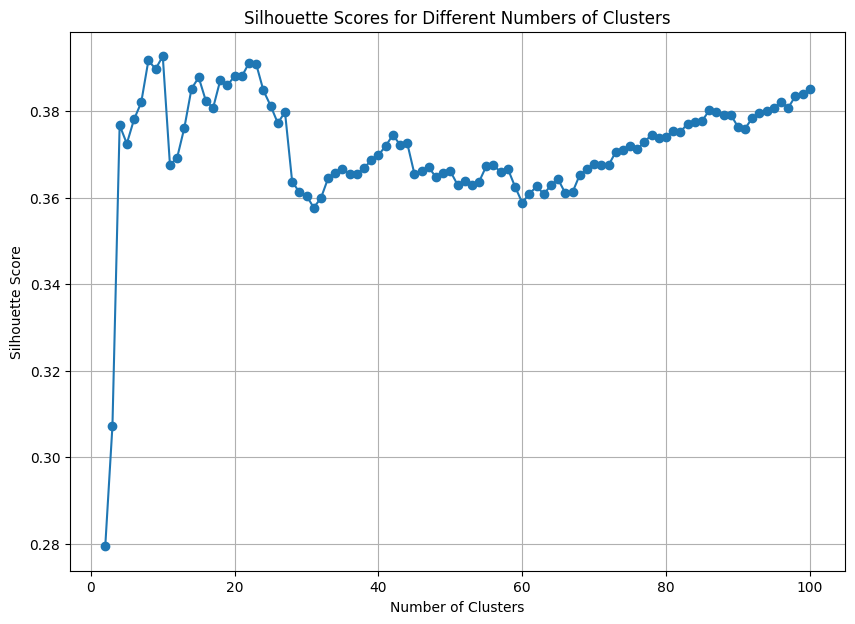

Silhouette score: 0.3927
Optimal number of clusters based on silhouette score: 10


In [40]:
# Finding the optimal clusters using silhouette score
p = compute_silhouette_scores(NC_df_modified, max_clusters=10, method='ward')
q = compute_silhouette_scores(NC_df_modified, max_clusters=100, method='ward')

##### Since overfitting is present and the silhouette score tends to increase with the number of clusters, we are relying on the ground truth of 3 clusters for hierarchical clustering on the Nested Clusters dataset.

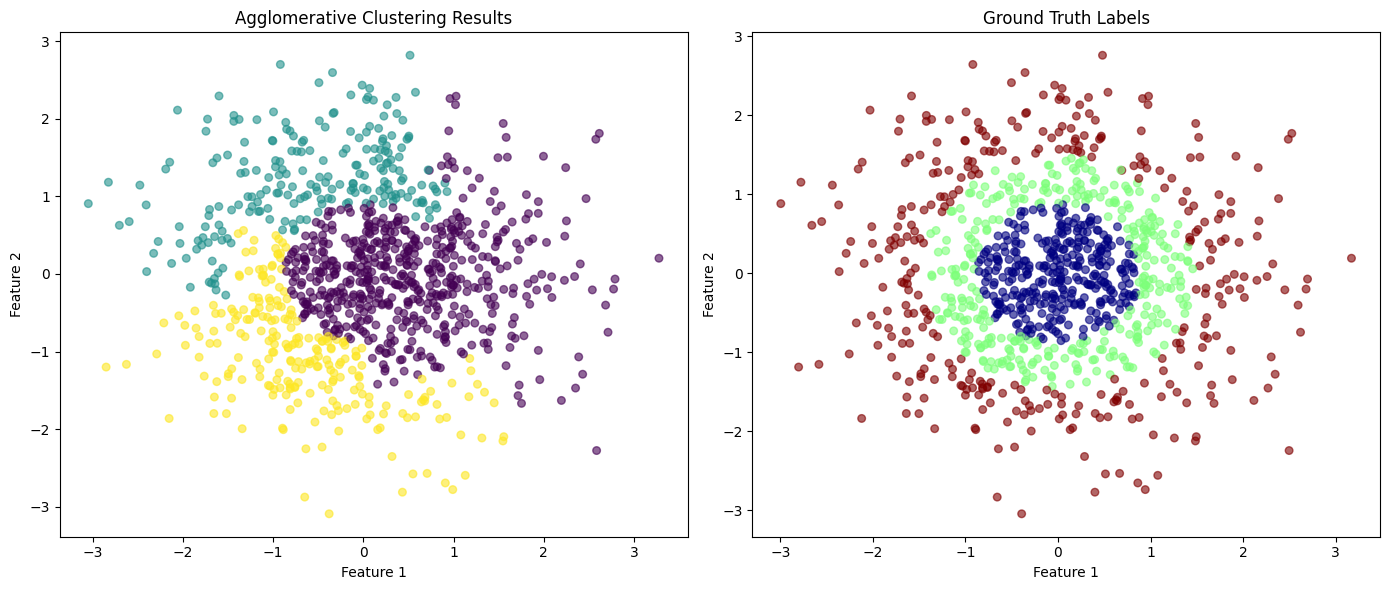

In [41]:
nc = run_hierarchical_clustering(NC_df_modified, 3, 'ward')
plot_clustering_and_truth(NC_df_modified.values, NC_df.values, nc, NC_df['Cluster'])